# Objective
This dataset is the top 50 Amazon best selling books for the years 2009-2019. It is comprised of the name of the best selling book, author, its user rating, total number of reviews, price, year and genre (fiction and non-fiction). This notebook's primary objective is to identify trends in the data and to visualize them for easier interpretation.
0. Some questions we will look to answer today are:
- Which authors have made the top 50 list the most?
- What has the average price/review been over the years?
- Which genre has the most top 50 placings and for which years?
- We will also check to see if there are any differences in terms of pricing/user rating between genres

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [20]:
df = pd.read_csv("data/amazon best books.csv")
print(df.isna().sum())
print(df.info())
print(df.describe())
df.head()
#print("Number of Unique Books: "+str(df["Name"].nunique()))
#print("Number of Unique Authors: "+str(df["Author"].nunique()))

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Initial findings
- The minimum user rating is a 3.3 with a median of 4.7 and a maximum of 4.9 thus no book has a perfect 5.
- The minimum number of reviews a book got was 37 with a median of 8,580 and a maximum of 87,841.
- The minimum price for a book is 0 with a median of 11 and a maximum of 105, this large discrepancy suggests that perhaps the 105 is an outlier.
- There are 351 unique books which suggest that some books have made the top 50 more than once.
- There are 248 unique authors which also suggest's that several have made the top 50 more than once.

# Genre Differences

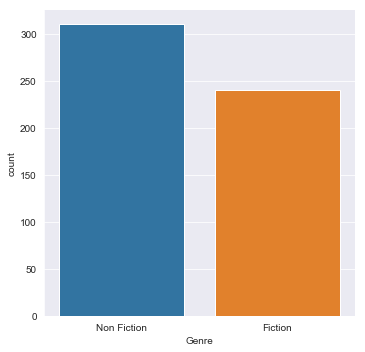

In [22]:
sns.catplot(x="Genre",kind="count", data=df);

It appears that Non Fiction has made the top 50 more times than Fiction

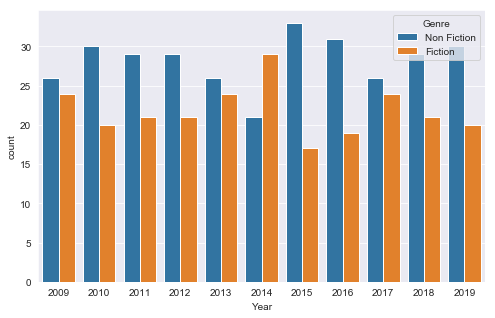

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="Year", hue="Genre", data=df);

Even when breaking it up into years, Non Fiction makes more appearances in the top 50 with the exception of 2014 

       User Rating       Reviews       Price         Year
count   310.000000    310.000000  310.000000   310.000000
mean      4.595161   9065.145161   14.841935  2014.058065
std       0.189555   8606.737629   12.043241     3.186214
min       4.000000     37.000000    0.000000  2009.000000
25%       4.500000   3235.000000    8.000000  2011.000000
50%       4.600000   6346.000000   12.000000  2014.000000
75%       4.700000  11124.250000   17.000000  2017.000000
max       4.900000  61133.000000  105.000000  2019.000000
       User Rating       Reviews      Price         Year
count   240.000000    240.000000  240.00000   240.000000
mean      4.648333  15683.791667   10.85000  2013.925000
std       0.265123  13984.120890    8.57275     3.142801
min       3.300000    548.000000    0.00000  2009.000000
25%       4.600000   6162.500000    6.00000  2011.000000
50%       4.700000  10922.000000    9.00000  2014.000000
75%       4.800000  21834.000000   13.00000  2017.000000
max       4.900000  87

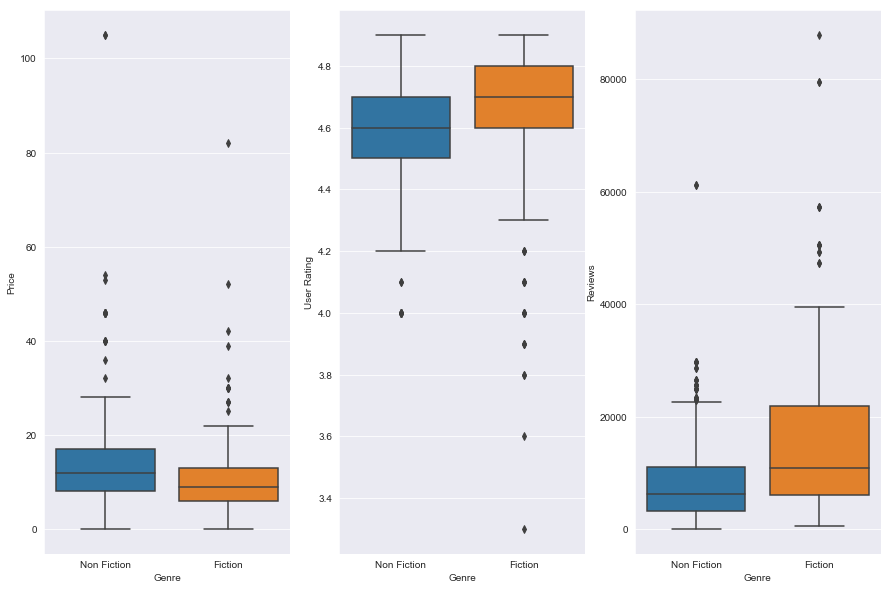

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15,10))

box_plot = sns.boxplot(df["Genre"], df["Price"], orient="v", ax=axes[0]);
# sns.swarmplot(df["Genre"], df["Price"], orient="v", ax=axes[0], color=".25")

sns.boxplot(df["Genre"], df["User Rating"], orient="v", ax=axes[1]);
# sns.swarmplot(df["Genre"], df["User Rating"], orient="v", ax=axes[1], color=".25")

sns.boxplot(df["Genre"], df["Reviews"], orient="v", ax=axes[2]);
# sns.swarmplot(df["Genre"], df["Reviews"], orient="v", ax=axes[2], color=".25");

median_price = df.groupby(["Genre"])["Price"].median()
median_user = df.groupby(["Genre"])["User Rating"].median()
median_review = df.groupby(["Genre"])["Reviews"].median()

print(df[df["Genre"] == "Non Fiction"].describe())
print(df[df["Genre"] == "Fiction"].describe())

##### Price 
For the most part it appears that most of the non-fiction and fiction books are below the 20 dollar mark. The median non-fiction price being 12 dollars and the median fiction price being 9 dollars. The large non-fiction outlier is 105 dollars authored by the American Psychiatric Association. The large fiction outlier is 82 dollars and is the famous Twilight Saga Collection. It doesn't surprise me that the majority of the best sellers are priced below the 20 dollar mark. Pricing a book too low may make people think that the book is subpar. While pricing too high results in people unwilling to take the plunge of buying your book. 

##### User Rating
Remarkably the median user rating between the two genres has only a .1 difference. The non-fiction being 4.6 and fiction being 4.7, and 75% of user ratings for the two genres being between 4.2 and 4.8. It seems that fiction books are rated only slightly higher than non fiction. However, fiction books have a larger amount of lower outlier scores.

##### Reviews
The distribution of non-fiction book reviews defintely seems to be a bit tight with 75% of the values being below 11,124.25 and the minimum number of reviews being 37. In comparison, fiction review counts are more spread out with 75% of the review counts being below 21,834 and the minimum being 0. It definitely seems that on average fiction books have a higher number of reviews than non fiction books.

# Differences through the years

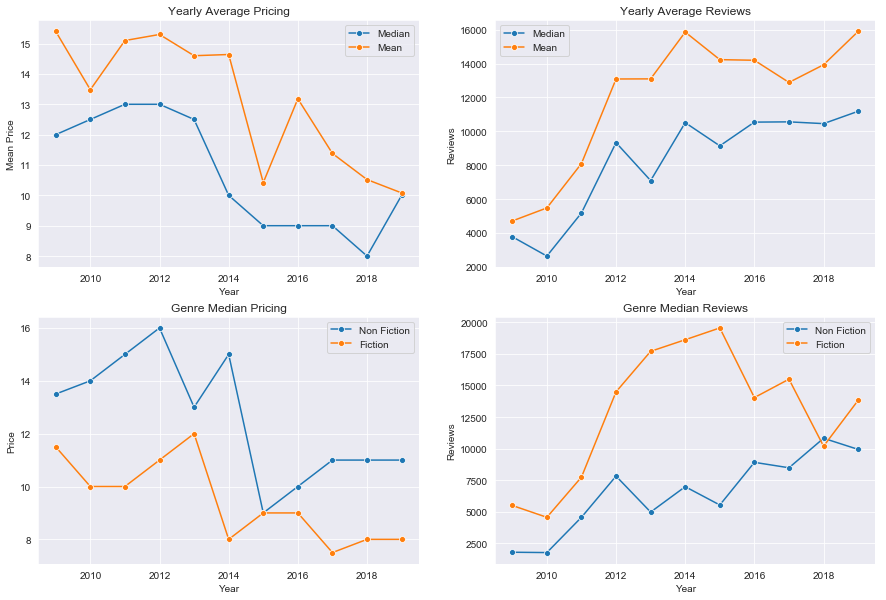

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

yearly_median_price = df.groupby("Year", as_index=False)["Price"].median()
yearly_median_price["Price"].rename("Median Price", inplace=True)
yearly_mean_price = df.groupby("Year", as_index=False)["Price"].mean()
yearly_mean_price["Price"].rename("Mean Price", inplace=True)
yearly_median_review = df.groupby("Year", as_index=False)["Reviews"].median()
yearly_mean_review = df.groupby("Year", as_index=False)["Reviews"].mean()
genre_median = df.groupby(["Genre", "Year"], as_index= False)[["Price", "Reviews"]].median()
fiction_median = genre_median[genre_median["Genre"] == "Fiction"]
non_median = genre_median[genre_median["Genre"] == "Non Fiction"]

sns.lineplot(data= yearly_median_price, x="Year", y="Price",label="Median",marker="o", ax=axes[0,0]).set_title("Yearly Average Pricing")
sns.lineplot(data=yearly_mean_price, x="Year", y="Price",label="Mean", marker="o", ax=axes[0,0]);
sns.lineplot(data= yearly_median_review, x="Year", y="Reviews",label="Median", marker="o",ax=axes[0,1]).set_title("Yearly Average Reviews")
sns.lineplot(data=yearly_mean_review, x="Year", y="Reviews",label="Mean", marker="o", ax=axes[0,1]);

sns.lineplot(data= non_median, x="Year", y="Price",label="Non Fiction",marker="o", ax=axes[1,0]).set_title("Genre Median Pricing");
sns.lineplot(data= fiction_median, x="Year", y="Price",label="Fiction",marker="o", ax=axes[1,0]).set_title("Genre Median Pricing");
sns.lineplot(data= non_median, x="Year", y="Reviews",label="Non Fiction",marker="o", ax=axes[1,1]).set_title("Genre Median Reviews");
sns.lineplot(data= fiction_median, x="Year", y="Reviews",label="Fiction",marker="o", ax=axes[1,1]).set_title("Genre Median Reviews");

##### Yearly Average's
- Average pricing is on a downwards trend as the years go by.
- Additionally, the average number of reviews has gone up throughout the years this may be in part to Amazon growing its customer base.

##### Genre Median's
- Interestingly, for genre pricing in 2014, the price of a non-fiction book on the top 50 was almost double what a fiction book was. As shown before this also happens to be the only year that the number of fiction books overtook the number of non fiction books. Non-fiction books on average are priced higher with 2015 being a notable exception where there median prices are the same. 
- The gap between the median amount of fiction reviews is widest between 2012-2015 with fiction being above non-fiction. Ultimately, 2015 being the year where the gap is widest. It certainly seems that in terms of top 50 best sellers people are more likely to leave a review for their favorite fiction book.

# Author Analysis

In [26]:
df["Author"].value_counts()

Jeff Kinney                           12
Rick Riordan                          11
Gary Chapman                          11
Suzanne Collins                       11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Eric Carle                             7
Dav Pilkey                             7
Stephenie Meyer                        7
Bill O'Reilly                          7
Stephen R. Covey                       7
Harper Lee                             6
J.K. Rowling                           6
The College Board                      6
Stieg Larsson                          6
E L James                              6
Don Miguel Ruiz                        6
Sarah Young                            6
John Grisham                           5
Dale Carnegie                          5
Laura Hillenbrand                      5
John Green                             5
R. J. Palacio   

It seems that quite a few authors have made the top 50 only 1 or 2 times. Lets filter those people out to find our top authors.

In [37]:
more_than_2 = df["Author"].value_counts().reset_index()
than_2 = more_than_2[more_than_2["Author"] > 2]
more_than_2[more_than_2["Author"] > 2].nunique()
only_1 = more_than_2[more_than_2["Author"] == 1]

Out of 248 unique authors in the dataset only about 58 have made the top 50 more than twice. Thats only 23% of all authors!
From here lets see if we can find the authors that made it more than 6 times. That would put them at the top 5%.

In [39]:
list_more_than_2 = []
for i in than_2["index"]:
    list_more_than_2.append(i)
more_2_authors = df[df["Author"].isin(list_more_than_2)]
more_2_authors


list_only_1 = []
for i in only_1["index"]:
    list_only_1.append(i)
only_1_author = df[df["Author"].isin(list_only_1)]
only_1_author

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
12,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011,Non Fiction
13,A Wrinkle in Time (Time Quintet),Madeleine L'Engle,4.5,5153,5,2018,Fiction
14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction


Top 5% Authors
       User Rating       Reviews       Price         Year  Weighted Rating
count   116.000000    116.000000  116.000000   116.000000       116.000000
mean      4.664655  10668.198276   14.784483  2013.439655         4.664474
std       0.234151   8151.516373   13.552992     3.073841         0.232703
min       4.000000    548.000000    0.000000  2009.000000         4.004481
25%       4.600000   5067.250000    7.000000  2011.000000         4.600073
50%       4.700000   7112.500000   10.000000  2013.000000         4.699678
75%       4.800000  17598.250000   17.000000  2016.000000         4.799604
max       4.900000  32122.000000   82.000000  2019.000000         4.899524

More than 2 Appearances
       User Rating       Reviews       Price         Year
count   300.000000    300.000000  300.000000   300.000000
mean      4.632000  13158.096667   13.300000  2013.743333
std       0.243118  10808.094755   10.521677     2.996786
min       3.300000    471.000000    0.000000  2009.00

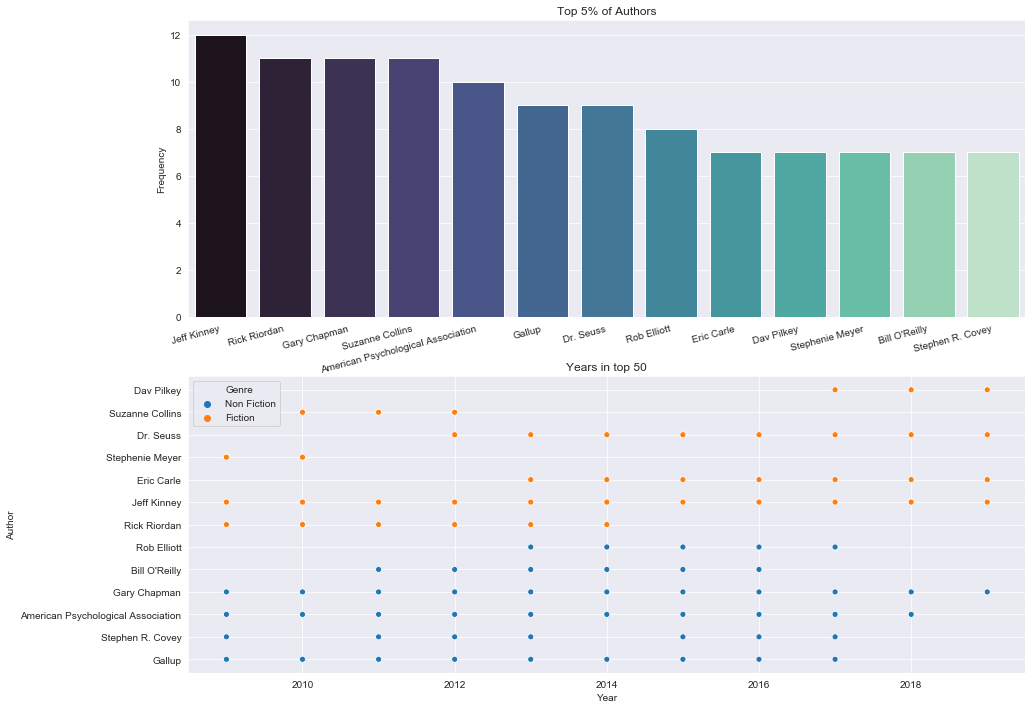

In [91]:
top_5pct = more_than_2[more_than_2["Author"] > 6]
top_5pct.rename(columns={"index":"Author", "Author":"Frequency"}, inplace=True)
authors_median = df.groupby("Author", as_index=False)[["Price", "Reviews"]].median()
new_df = top_5pct.merge(authors_median, how="left", on="Author")

list_authors = []
for i in new_df["Author"]:
    list_authors.append(i)
top_authors_years = df[df["Author"].isin(list_authors)]    
top_authors_sorted = top_authors_years.sort_values("Genre", ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(15,12))
sns.barplot(new_df["Author"], new_df["Frequency"], palette="mako", ax=axes[0]).set_title("Top 5% of Authors");
sns.scatterplot(x="Year", y="Author", data=top_authors_sorted, hue="Genre", ax=axes[1]).set_title("Years in top 50");
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=15, ha='right');
print("Top 5% Authors")
print(top_authors_sorted.describe())
print("\nMore than 2 Appearances")
print(more_2_authors.describe())
print("\nAuthors with only 1 Appearance")
print(only_1_author.describe())

##### Authors
- In the top 5% we have some authors of some very famous books. For instance, Dav Pikey is best known for writing "Diary of a Wimpy Kid", Suzanna Collins is best known for her "Hunger Games" book series, and you also have some very famous childrens book authors such as Dr.Seuss and Eric Carle author of the famous "The Very Hungry Caterpillar". You also have several self help gurus and one political commentator.
- Interestingly, the mean price between the top 5% of authors, authors with only two appearances, and authors with only one appearance remains about the same. With the price of the top 5% being a dollar higher.

##### Through The Years
- It seems that the non-fiction books have a bit more of a consistent trend going for them. The fiction books have a lot of lapses within the years compared to the non-fictions.

# Weighted Rating Analysis
There is a large disparity between the number of reviews that each book has, because of this disparity I believe it would be beneifical to look into a weighted rating. This will hopefully give us a clearer picture on which books are the best reads relative to their weighted rating. Using IMDB's weighted rating system can potentially help us achieve this. 

- The forumla that IMDB uses is: weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
- R = average rating for the book 
- v = number of reviews for the book
- m = minimum votes required to be listed in the top 50 
- C = the mean rating

<Figure size 1440x360 with 0 Axes>

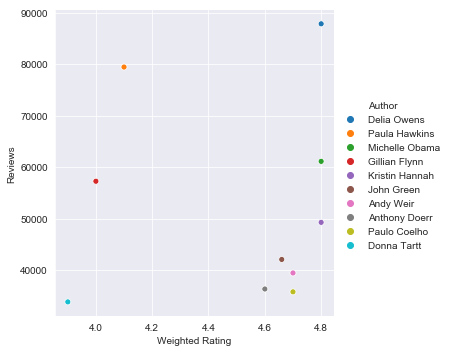

In [86]:
m = min(df["Reviews"])
C = df["User Rating"].mean()
def weighted(x, m=m, C=C):
    v = x["Reviews"]
    R = x["User Rating"]
    return ((v/(v+m))*R) + ((m/(m+v))*C)
df["Weighted Rating"] = df.apply(weighted, axis=1)
weighted_authors = df.groupby(["Author", "Genre"], as_index=False)["Weighted Rating", "Reviews"].mean()
x = weighted_authors.sort_values(["Reviews"], ascending= False)

plt.figure(figsize=(20,5));
sns.relplot(x="Weighted Rating", y="Reviews", hue="Author" ,data=x.head(10));

As you can see if we order them by the Weighted Rating and the number of reviews we are left with these authors. Delia Owens takes the top with a 4.8 weighted rating and over 80,000 reviews. Paula Hawkin has a 4.1 rating with about 80,000 reviews and we also have Michelle Obama with a 4.8 rating and a bit over 60,000 reviews.

# Findings Summary

- Non-fiction books are more popular in the top 50, while also being more expensive than fiction books.
- Fiction books tend to have a higher user rating as well as a higher review count.
- Only a small handful of authors have made the top 50 bestseller list more than 10 times.
- A large reason why the number of reviews keep going up over the years is because Amazon has consistently been growing its customer base since 2009. 
- The top 5% of fiction authors in terms of frequency on the top 50 list tend to be the writers of popular mainstream book series such as Dr. Seuss, Twilight, and The Hunger Games. 
- While the top 5% of non-fiction authors tend to be self help gurus and political commentators. 